<a href="https://colab.research.google.com/github/shimamz71/9-TYPE-OF-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(299, 402)
(297, 400)


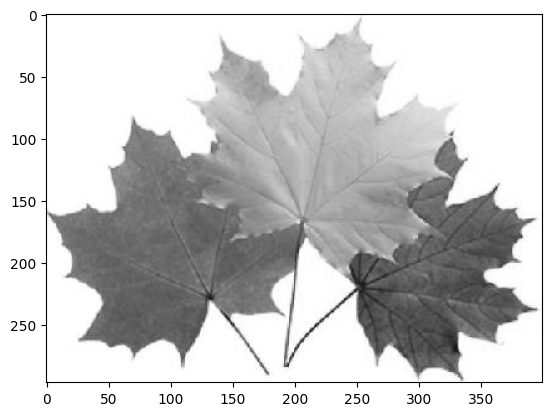

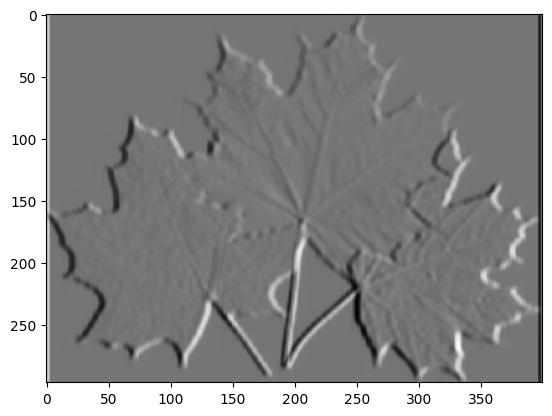

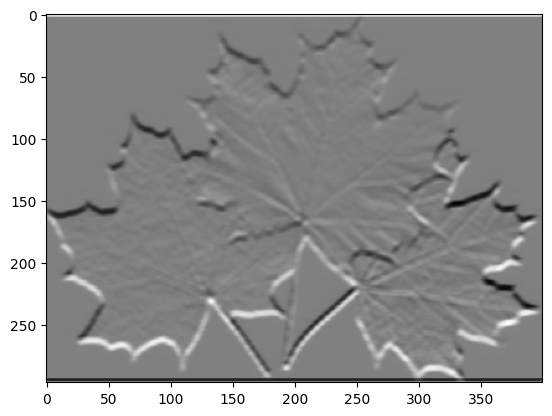

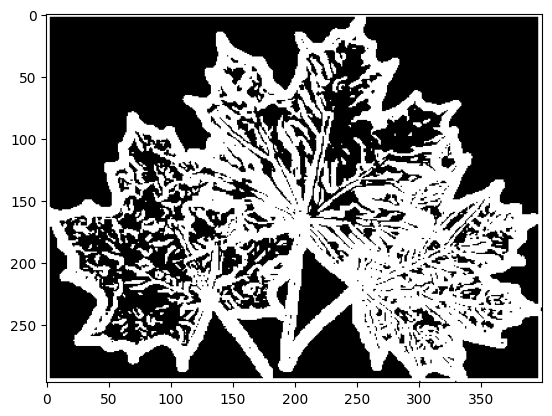

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image in BGR format
image = cv2.imread('/content/drive/MyDrive/Deep_Learning/Deep_learning/Barg.jpg')
# plt.imshow(image)
# plt.show()
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# print(gray_image.shape)

# plt.imshow(gray_image, 'gray')
# plt.show()

def padding_image(gray, padding):
    image_padded = np.zeros((gray.shape[0] + (padding+1), gray.shape[1] + (padding+1)))
    image_padded[padding:-1, padding:-1] = gray
    return image_padded


def smoothing(gray1):
    image_p = padding_image(gray1,1)
    mask = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
    mask = mask.reshape(3,3)
    mask = (1/16) * mask
    smooth1 = np.zeros((gray1.shape[0], gray1.shape[1]))
    for x in range(gray1.shape[1]):
        for y in range(gray1.shape[0]):
            # element-wise multiplication of the kernel and the image
            smooth1[y, x] = (mask * image_p[y: y + 3, x: x + 3]).sum()
    smooth2 = cv2.GaussianBlur(image_p, (5, 5), 5)
    return smooth2


def edge(gray1):
    smooth = smoothing(gray1)
    print(smooth.shape)
    print(gray1.shape)
    ky = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
    kx = np.rot90(ky)
    G_x = np.zeros((gray1.shape[0], gray1.shape[1]))
    G_y = np.zeros((gray1.shape[0], gray1.shape[1]))
    for x in range(gray1.shape[1]):
        for y in range(gray1.shape[0]):
            # element-wise multiplication of the kernel and the image
            G_y[y, x] = (ky * smooth[y: y+3, x: x+3]).sum()
            G_x[y, x] = (kx * smooth[y: y + 3, x: x + 3]).sum()
    G = np.zeros((gray1.shape[0], gray1.shape[1]))
    for x1 in range(gray1.shape[1]):
        for y1 in range(gray1.shape[0]):
            # element-wise multiplication of the kernel and the image
            G[y1, x1] = np.sqrt((G_y[y1, x1]**2) + (G_x[y1, x1]**2))

    plt.imshow(gray1, 'gray')
    plt.show()

    for x2 in range(gray1.shape[1]):
        for y2 in range(gray1.shape[0]):
            if G[y2, x2] <= 10:
                G[y2, x2] = 0
            if G[y2, x2] > 10:
                G[y2, x2] = 255
    plt.imshow(G_x, 'gray')
    plt.show()
    plt.imshow(G_y, 'gray')
    plt.show()
    plt.imshow(G, 'gray')
    # plt.show()
    # plt.imshow(i4, 'gray')
    # plt.show()
edge(gray_image)